# Group: Chris Conatzer, Ethan Matus, Zachary Qian

**Note: We affirm that I personally wrote the text, code, and comments in this in-class assignment.**



# Finding a path through a maze

Let's write a program that finds a path through a maze.

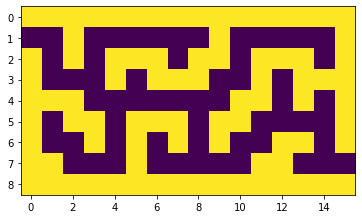

In the above maze, walls are yellow, and passable space is dark purple. We start the maze in the empty space at `(1, 0)` -- where we write the row first, followed by the column (opposite of the usual graph notation). At each step, we can move up, down, left, or right, but not diagonally. Our goal is to come out of the other side of the maze, i.e. to end up at `(7, 15)`.

Start by running the next cell.

In [1]:
from matplotlib import pyplot as plt
import copy

In the above two lines, we are importing the modules we'll use for our program. `pyplot` from `matplotlib` will allow us to draw a picture of our maze, just like the one above. We will explain why we need `copy` once we get there.

I have written the main routine for our program. You will write each of the functions called inside it. The calls are currently commented out so that you may uncomment them as you implement the functions, one by one. The entire working code of the program will thus be separated into self-contained functions, including the main routine (to avoid using the global scope).

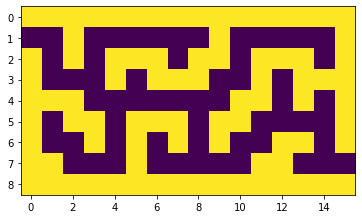

In [13]:
def main():
    maze_str = '''
++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    '''
    start = (1, 0)
    end = (7, 15)
    maze = build_maze(maze_str)
    plot_maze(maze)
    #path = solve_maze(maze, start, end)
    #plot_maze_solution(maze, path)
    

if __name__ == '__main__':
    main()

NameError: name 'maze' is not defined

`maze_str` is a string representation of the maze from the picture above; `+` is a wall and a single space character is passable space. Note that triple quotes are used to define a string across multiple lines. `start` and `end` are the positions for where we start and where we want to end up in the maze, as explained in the beginning.

`if __name__ == '__main__'` is an idiom that you will frequently encounter in Python. `__name__` is a special variable set by the interpreter; roughly speaking, it is set equal to the string `'__main__'` whenever your code is run directly, rather than imported as a module. In our program, this will result in running the `main` routine when you run the cell.

The idea is that if you were writing this code in a Python script, somebody may want to recycle the functions that you will develop here by importing your module (but not run the `main` routine). Because of this check, the `main` routine won't run in that scenario, but the functions defined will be made available to whatever script imported your code.

In the code cell below, declare and implement the `build_maze` function. The function needs to take a string like `maze_str` in the `main` function above and turn it into a two-dimensional list of integers (list of lists of integers), where the inner lists are rows of wall or empty space, `0` is empty space, and `1` is a wall.

For instance, the list `[[1, 1, 1], [1, 1, 0], [1, 1, 1]]` would represent a 3x3 block of walls with an empty space carved out in the middle right.

Note: before you split the maze string across lines, you should call `.strip()` on it -- this will trim the whitespace from the ends of it.

The function `build_maze` ought to take around 6 lines. Make sure to test your function (print out its output and intermediate calculations, if necessary, to see that you're getting the right results).

In [7]:
#k = [1, 1, 1]
#k[:3]
maze_str = '''
++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    '''
maze_str.strip().split("\n")

['++++++++++++++++',
 '  +      +     +',
 '+ + +++ ++ +++ +',
 '+   + +++  + +++',
 '+++       ++ + +',
 '+ ++ +++ ++    +',
 '+  + + + +  ++ +',
 '++   +     ++   ',
 '++++++++++++++++']

In [10]:
def build_maze(maze_str):
    l = []
    big_list = []
    new_str = maze_str.strip().split("\n")
    for row in new_str:
        for i in row:
            if i == "+":
                l.append(1)
            else:
                l.append(0)
        big_list.append(l)
        l = []
    return big_list


        
            
    
    

In [11]:
maze_str = '''
++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    '''
build_maze(maze_str)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In the code cell below, I've declared and implemented the `plot_maze` function. The function takes a maze coded as a list (not string), and uses a module we imported to make a picture of the maze, just like the one above. This is just one line -- a call to `plt.imshow` with the maze object. Run the next cell.

In [12]:
def plot_maze(maze):
    plt.imshow(maze)

In the `main` routine above, uncomment the two function calls to `build_maze` and `plot_maze`, and run the cell. You should get a plot of the maze that is identical to the picture at the top of the page.

The function `solve_maze` takes a maze object `maze`, the starting position `start`, and the ending position `end`; and it returns a list of positions (two-integer tuples) of every square that we visit along the way from start to end. Check the `main` routine above to see how this function is called.

Here's the idea for implementing `solve_maze`. Declare a list called `path` that keeps track of the path, containing only the tuple `start`. The last element of this list is your "current position". On a loop, replace the square in the maze at your current position with `2` -- a visited square. Then look for any adjacent square that you can move to, that has not been visited. If there are no such squares, backtrack (throw away elements from the end of the path).

In the code cell below, finish writing a helper function that takes the maze and the current position and returns the location of the next square to try moving to. It should take around 5 lines.

In [15]:
def choose_valid_move(maze, pos):
    #we need to check if last row or first row
    # we need to check above and below locations
    #holder = []
    directions = [[1,0],[-1,0],[0,1], [0,-1]] #instantiate a list of directions
    for i in directions:
        if maze[pos[0] + i[0]][pos[1] + i[1]] == 0:
            return (pos[0] + i[0],pos[1] + i[1])
        
    
    #Check x-coord (element within each list y)
    #if maze[pos[0]+1][pos[1]] ==0:
    #    return
    #Check y-coord (given list)
    #elif
    return None

Using the above function, write the `solve_maze` function according to the idea above.

There is only one technicality. In order to mark the spaces already visited, you have to change the `maze` object passed to the function. Because lists are mutable, this will end up changing the original copy, which we want to avoid. So we use `copy` to make a copy of the maze first. Fill in the function below. It should take around 13 lines.

In [ ]:
def solve_maze(maze, start, end):
    maze = copy.deepcopy(maze)
    #pos = start
    path = [start]
    while maze[pos[0]][pos[1]] != end:
        temp = choose_valid_move(maze,path[-1]) #store last position in path list
        if temp:
            path.append(temp)
        else:
            
    
    
    # add your code here

Lastly, write the `plot_maze_solution` function in the code cell below. The function ought to take a maze and a path, and mark the squares along the path with a different value (`2` as before will work), then plot the maze. Remember to make a deep copy of the maze again, just as above, since otherwise you would be changing the original list that is passed as an argument to the function. This function ought to take around 4 lines.

Run each of your code cells and the `main` routine above, with all the function calls uncommented. (You may have to comment out one of the `plot_` function calls, since you can only see one plot at a time.)

Try commenting out the `copy.deepcopy` lines from your code, and run it again, showing the solution. Discuss with your group what goes wrong.

Now make your own maze -- add a second maze string to the `main` routine above with a maze of your own, and run your program to solve it.